In [1]:
# imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset
digits = datasets.load_digits()

In [3]:
# create feature and target arrays
x = digits.data
y = digits.target

# Split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [4]:
# Create and fit the kNN classifier for the number of neighbours in the range k=1-10
# Store the accuracy for plotting
train_scores = []
test_scores = []

for k in range(1, 11, 1):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    train_scores.append(neigh.score(x_train, y_train))
    test_scores.append(neigh.score(x_test, y_test))

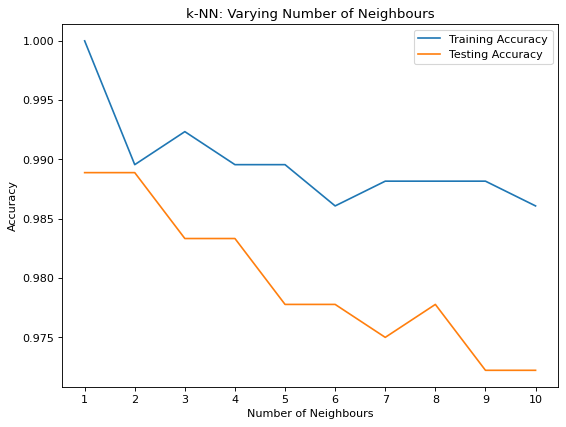

In [16]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(1, 11), train_scores, label='Training Accuracy')
plt.plot(np.arange(1, 11), test_scores, label='Testing Accuracy')
plt.title('k-NN: Varying Number of Neighbours')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,11))
plt.legend()
plt.show()

#### According to the results from the figure above, smaller k-values have better performance on both the training set and testing set.


## Implement Support Vector Machine

In [4]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear', gamma='auto'))
clf.fit(x_train, y_train)
print("SVM with linear kernel:\n", classification_report(y_test, clf.predict(x_test)))

SVM with linear kernel:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.94      0.97        34
           2       1.00      1.00      1.00        42
           3       0.93      0.96      0.95        27
           4       1.00      1.00      1.00        28
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        39
           8       0.87      1.00      0.93        34
           9       1.00      0.89      0.94        38

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [6]:
svm_poly = make_pipeline(StandardScaler(), SVC(kernel = 'poly', gamma='auto'))
svm_poly.fit(x_train, y_train)
print("SVM with poly kernel:\n", classification_report(y_test, svm_poly.predict(x_test)))

SVM with poly kernel:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.97      0.99        34
           2       1.00      0.90      0.95        42
           3       1.00      0.78      0.88        27
           4       1.00      1.00      1.00        28
           5       0.98      0.91      0.95        47
           6       1.00      0.97      0.98        33
           7       1.00      0.95      0.97        39
           8       0.60      1.00      0.75        34
           9       0.97      0.84      0.90        38

    accuracy                           0.93       360
   macro avg       0.95      0.93      0.93       360
weighted avg       0.96      0.93      0.94       360



In [8]:
svm_sig = make_pipeline(StandardScaler(), SVC(kernel = 'sigmoid', gamma='auto'))
svm_sig.fit(x_train, y_train)
print("SVM with sigmoid kernel:\n", classification_report(y_test, svm_sig.predict(x_test)))

SVM with sigmoid kernel:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.82      0.82      0.82        34
           2       0.88      0.90      0.89        42
           3       0.90      0.96      0.93        27
           4       0.90      0.96      0.93        28
           5       0.96      0.98      0.97        47
           6       1.00      1.00      1.00        33
           7       0.95      0.95      0.95        39
           8       0.92      0.97      0.94        34
           9       1.00      0.82      0.90        38

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



#### As we can see from the above classification reports, the best kernel to use in this case is the linear kernel.


## Implement Naive Bayes Classifier

In [11]:
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [12]:
confusion_matrix(y_test, nb_clf.predict(x_test))

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 25,  1,  0,  0,  0,  0,  4,  4,  0],
       [ 0,  2, 24,  0,  0,  0,  0,  0, 16,  0],
       [ 0,  1,  0, 17,  0,  1,  0,  1,  5,  2],
       [ 0,  0,  0,  0, 27,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0, 41,  0,  1,  1,  2],
       [ 0,  0,  1,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 38,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 33,  0],
       [ 0,  3,  0,  0,  1,  2,  0,  1,  7, 24]], dtype=int64)

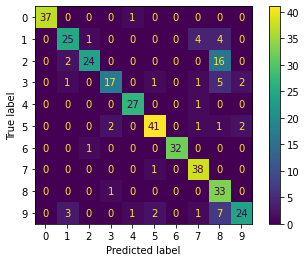

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, nb_clf.predict(x_test))
plt.show()